In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [2]:
df = pd.read_csv('Фильтр по задачам (Jira) 2024-07-18T13_33_33+0300.csv')
df3 = pd.read_excel('Лист Microsoft Excel.xlsx')
df4 = pd.read_excel('Лист Microsoft Excel (2).xlsx')

In [3]:
#Для оценки открытых задач
df13 = df.query('`Ключ проблемы`.str.contains("DE|SA-") & `Статус`.str.contains("Cancel|Закрыт|Готово") ')#.to_excel('text.xlsx')
df13.head(1)

,Ключ проблемы,Идентификатор проблемы,Идентификатор родителя,Статус,Создано,Обновленo,Исполнитель,Пользовательское поле (Story Points),Тема,Создатель
8,SA-224,309467,NaN,Cancel,15.07.2024 18:22,15.07.2024 18:23,NaN,NaN,Создание витрины по всем сделкам,mikhaelyanta


In [4]:
df['Обновленo'] = pd.to_datetime(df['Обновленo'])
df['Создано'] = pd.to_datetime(df['Создано'])


C:\Users\flerinvs\AppData\Local\Temp\ipykernel_20152\2432558262.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M  format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Обновленo'] = pd.to_datetime(df['Обновленo'])
C:\Users\flerinvs\AppData\Local\Temp\ipykernel_20152\2432558262.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M  format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Создано'] = pd.to_datetime(df['Создано'])


In [5]:
# Группирвока статусов
def func(status):
    if 'В работе' in status or 'Сделать' in status or 'Backlog' in status or 'Hold' in status  or 'В работе' in status or 'In Review' in status:  
       return 'Бэклог'
    elif 'Готово' in status:
        return 'Готово'
    else:
        return 'Прочее'

df['status'] = df['Статус'].apply(func)

In [6]:
#df11 = df.query(' `Создано`>="2023-01-01" & `Ключ проблемы`.str.contains("SA-|DE") & `status`.str.contains("Бэклог|Готово")')
df11 = df.query('  `Ключ проблемы`.str.contains("SA-") & `status`.str.contains("Бэклог|Готово|Прочее")')
df11 = df11.groupby([df['Обновленo'].dt.to_period('M'), 'status' ]).agg({'Ключ проблемы': "count"})
df11

Ключ проблемы
Обновленo status               
2024-01   Готово              4
2024-02   Бэклог              1
          Готово              5
          Прочее              2
2024-03   Бэклог              1
          Готово              3
          Прочее              1
2024-04   Бэклог              1
          Готово              3
          Прочее              1
2024-05   Бэклог              3
          Прочее              2
2024-06   Бэклог             12
          Прочее              1
2024-07   Бэклог             19
          Прочее              4

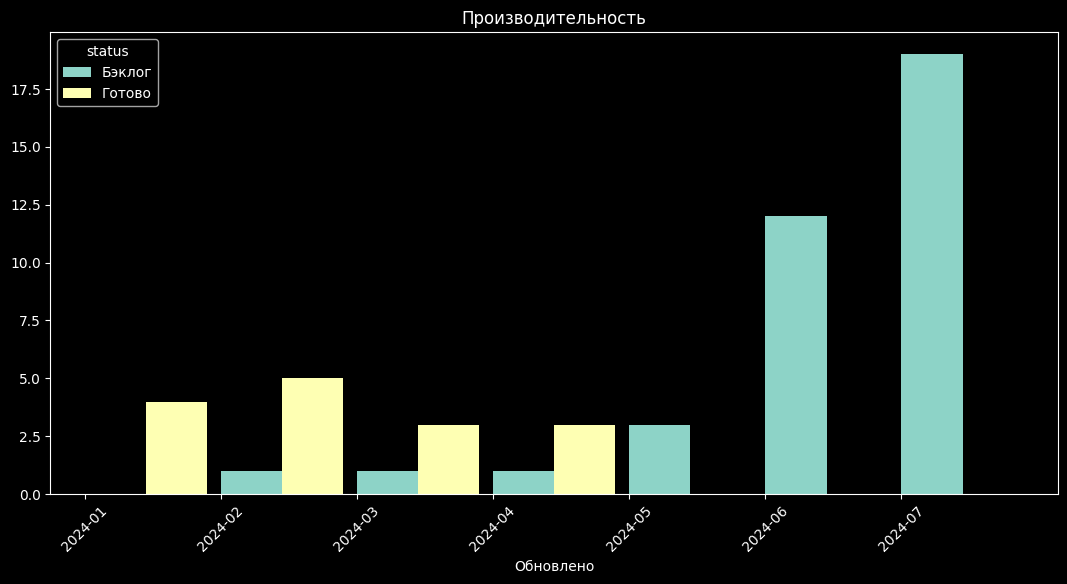

In [7]:
df11 = df11.query('~`status`.str.contains("Прочее")')
df11.pivot_table(index='Обновленo', columns='status', values='Ключ проблемы').plot(kind='bar', figsize=(13, 6), width=0.9, align='edge')
plt.title('Производительность') # Установите желаемый заголовок
plt.xticks(rotation=45) # Установите поворот подписей на 45 градусов
plt.show()

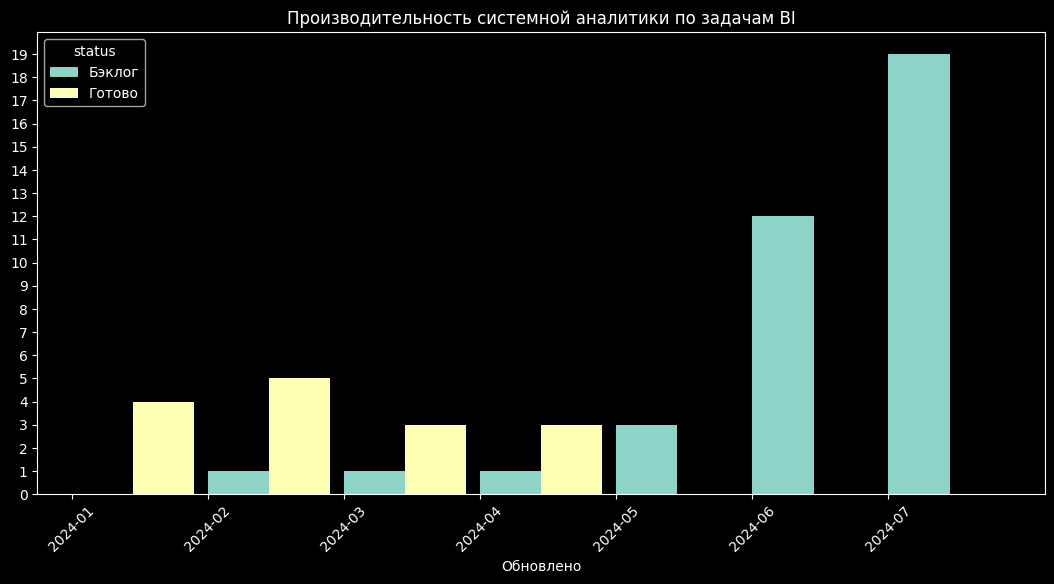

In [8]:
pivot_table = df11.pivot_table(index='Обновленo', columns='status', values='Ключ проблемы')
max_value = pivot_table.max().max()
whole_numbers = range(0, int(max_value) + 1, 1)

pivot_table.plot(kind='bar', figsize=(13, 6), width=0.9, align='edge')
plt.title('Производительность системной аналитики по задачам BI') # Установите желаемый заголовок
plt.xticks(rotation=45) # Установите поворот подписей на 45 градусов
plt.yticks(whole_numbers) # Установите только целые значения на оси y
plt.show()

Для задач. Мердж комментов

In [9]:
t = df.query('`Ключ проблемы`.str.contains("DE|SA") & ~`Статус`.str.contains("Cancel|Закрыт|Готово")')
t1= pd.merge(t, df3[['Ключ проблемы', 'Комментарий']], how = 'left', on = 'Ключ проблемы')
t2 =pd.merge(t1, df4[['Ключ проблемы', 'Коммент']], how = 'left', on = 'Ключ проблемы')
t2.head(1)#.to_excel('задачи.xlsx')

,Ключ проблемы,Идентификатор проблемы,Идентификатор родителя,Статус,Создано,Обновленo,Исполнитель,Пользовательское поле (Story Points),Тема,Создатель,status,Комментарий,Коммент
0,SA-229,309554,NaN,Backlog,2024-07-16 10:20:00,2024-07-16 10:39:00,NaN,NaN,Датасет для отчета РНКБ,mikhaelyanta,Бэклог,NaN,NaN


Velocity

In [10]:
df1 = pd.read_csv('Jira 2024-07-18T13_48_44+0300.csv')
df1.head(1)

,Ключ проблемы,Идентификатор проблемы,Статус,Создано,Обновленo,Исполнитель,Пользовательское поле (Story Points),Тема,Создатель
0,ANL-2667,309671,Готово,16.07.2024 14:34,18.07.2024 13:14,flerinvs,3.0,Сформировать бэклог мидла,flerinvs


C:\Users\flerinvs\AppData\Local\Temp\ipykernel_20152\1626472486.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M  format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Обновленo'] = pd.to_datetime(df1['Обновленo'])


<Axes: ylabel='Обновленo'>

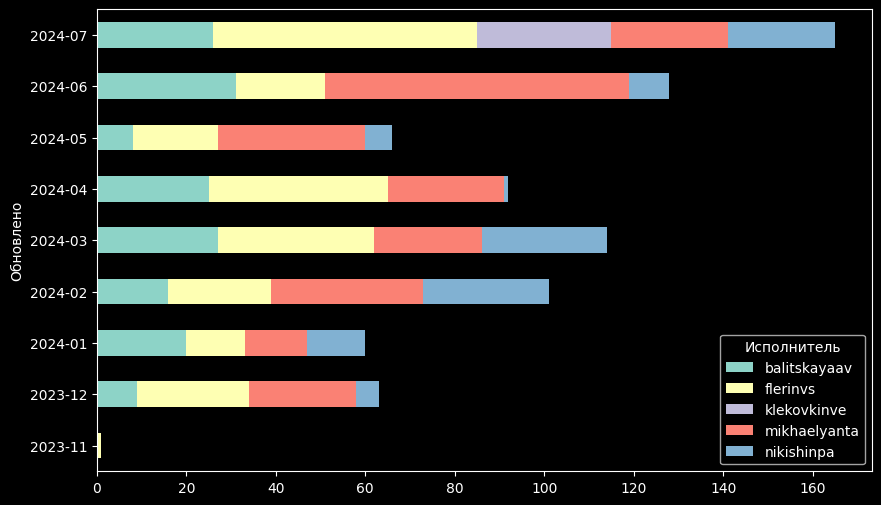

In [11]:
#df1 = df1.query("~`Исполнитель`.str.contains('flerinvs')")
df1['Обновленo'] = pd.to_datetime(df1['Обновленo'])
t1 = df1.groupby([df1['Обновленo'].dt.to_period('M'), 'Исполнитель']).agg({'Пользовательское поле (Story Points)': "sum"})
t1.pivot_table(index='Обновленo', columns='Исполнитель', values='Пользовательское поле (Story Points)').plot(kind='barh', stacked=True, figsize=(10, 6)) #, stacked=True

<Axes: xlabel='Обновленo'>

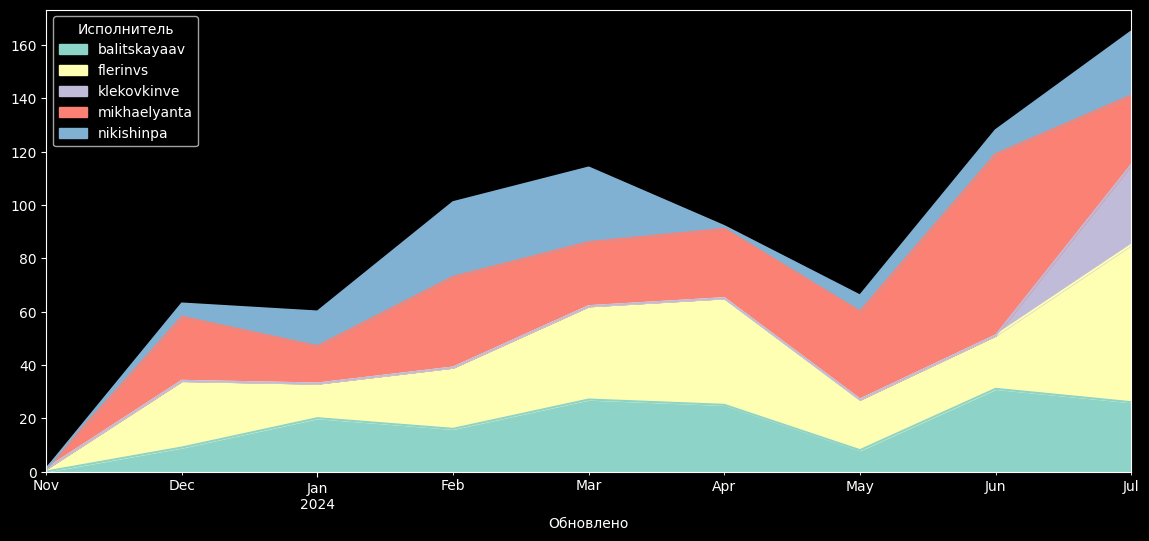

In [12]:
t1.pivot_table(index='Обновленo', columns='Исполнитель', values='Пользовательское поле (Story Points)').plot(kind='area', stacked=True, figsize=(14, 6)) #, stacked=True